Using TensorFlow backend.
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 0s 65us/step - loss: 2.4139 - acc: 0.1415 - val_loss: 2.0535 - val_acc: 0.4770
Epoch 2/5
6000/6000 [==============================] - 0s 29us/step - loss: 2.0825 - acc: 0.2635 - val_loss: 1.8517 - val_acc: 0.5880
Epoch 3/5
6000/6000 [==============================] - 0s 28us/step - loss: 1.8781 - acc: 0.3840 - val_loss: 1.6649 - val_acc: 0.6730
Epoch 4/5
6000/6000 [==============================] - 0s 28us/step - loss: 1.6901 - acc: 0.4680 - val_loss: 1.5078 - val_acc: 0.7040
Epoch 5/5
6000/6000 [==============================] - 0s 28us/step - loss: 1.5335 - acc: 0.5425 - val_loss: 1.3632 - val_acc: 0.7190


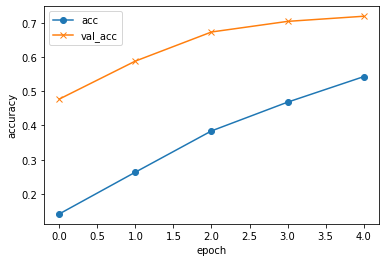

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy",
              metrics=["accuracy"])

# epochs 수를 5로 합니다
history = model.fit(X_train, y_train, batch_size=500, epochs=5,
                    verbose=1, validation_data=(X_test, y_test))

# acc, val_acc의 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-",
         marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()


In [6]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ---------------------------
# 다음 행을 변경하세요
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# ---------------------------


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


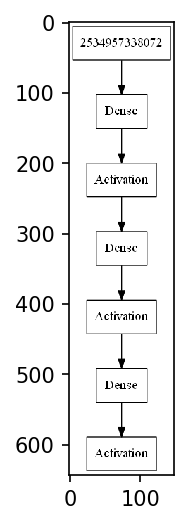

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
# 입력 유닛 수는 784개이며, 첫번째 전결합층의 출력 유닛 수는 256입니다
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

# 두번째 전결합층의 출력 유닛 수는 10입니다
# ---------------------------
# 여기에 코드를 작성하세요
model.add(Dense(128))
model.add(Activation("relu"))
# ---------------------------

# 세번째 전결합층(출력층)의 출력 유닛 수는 10개입니다
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 구조를 출력합니다
plot_model(model, "model125.png", show_layer_names=False)
# 모델 구조를 시각화합니다
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

Epoch 1/3
6000/6000 [==============================] - 1s 163us/step - loss: 2.0914 - acc: 0.4130
Epoch 2/3
6000/6000 [==============================] - 1s 113us/step - loss: 1.6768 - acc: 0.6848
Epoch 3/3
6000/6000 [==============================] - 1s 94us/step - loss: 1.3594 - acc: 0.7612


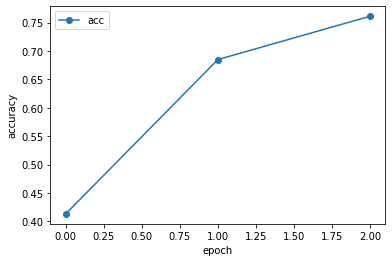

In [3]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras import optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
# ---------------------------
# 여기에 코드를 작성하세요
history = model.fit(X_train, y_train, verbose=1, epochs=3)
# ---------------------------
# acc, val_acc의 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train)

# ---------------------------
# 여기에 코드를 작성하세요
score = model.evaluate(X_test, y_test, verbose=1)
# ---------------------------
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/1
1000/1000 [==============================] - 0s 74us/step
evaluate loss: 1.9165027122497558
evaluate acc: 0.591


Epoch 1/1
6000/6000 [==============================] - 1s 159us/step - loss: 2.1255 - acc: 0.3943
evaluate loss: 1.9181406126022338
evaluate acc: 0.616


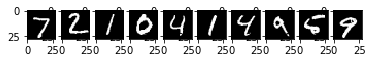

[7 2 1 0 4 1 4 4 2 7]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

# 테스트 데이터의 첫 10장을 표시합니다
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# X_test의 첫 10장의 예측된 라벨을 표시합시다
# ---------------------------
# 여기에 코드를 작성하세요
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)
# ---------------------------

Epoch 1/1
10000/10000 [==============================] - 1s 132us/step - loss: 1.9553 - acc: 0.5247
evaluate loss: 1.6588781566619872
evaluate acc: 0.651


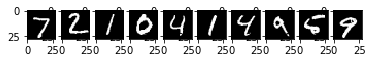

[7 6 1 0 4 1 4 9 4 7]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
%matplotlib inline

# 데이터 세트를 가져옵니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:1000]

# 1. 모델을 생성합니다 
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 2. 학습시킵니다
model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# 3. 모델로 분류합니다
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)